**Udacity Machine Learning Nanodegree Capstone Project**

**Prediction of stock market price: Forecasting Closing price of Nifty50 (NSE India) three months in advance**

In [97]:
import pandas as pd
import os

In [99]:
# loading the raw data contianing prices
nifty50_data = pd.read_csv("nifty50_1_yr_data.csv")
print(nifty50_data.head())
print(nifty50_data.describe())

          Date      Open      High      Low     Close  Shares Traded  \
0  01-Feb-2018  11044.55  11117.35  10878.8  11016.90      315743486   
1  02-Feb-2018  10938.20  10954.95  10736.1  10760.60      291431992   
2  05-Feb-2018  10604.30  10702.75  10586.8  10666.55      247479157   
3  06-Feb-2018  10295.15  10594.15  10276.3  10498.25      274656443   
4  07-Feb-2018  10607.20  10614.00  10446.4  10476.70      258095424   

   Turnover (Rs. Cr)  
0           17719.40  
1           16542.51  
2           13980.63  
3           15606.34  
4           13971.66  
               Open          High           Low         Close  Shares Traded  \
count    247.000000    247.000000    247.000000    247.000000   2.470000e+02   
mean   10764.113158  10807.170850  10698.181377  10753.047571   2.840968e+08   
std      383.401311    373.496173    382.483533    377.090108   9.262864e+07   
min     9968.800000  10027.700000   9951.900000   9998.050000   3.219418e+07   
25%    10519.800000  10569.67

From the above description of data we see that the corresponding statistics of Open, High, Low & Close are very similar; however, the statistics across Shares Traded & Turnover the vary. This implies the need of standardization of data.

In [3]:
##To check if NA's are present.
nifty50_data.isnull().values.any()

False

Since, there are no null values we see no requirement of null values treatment. 

We will now standardize the data.

In [179]:
from sklearn import preprocessing

numeric_columns = ["Open", "High", "Low", "Close", "Shares Traded", "Turnover (Rs. Cr)"]
# Get column names first
nifty50_data_numeric = nifty50_data[numeric_columns]
# Create the Scaler object
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(nifty50_data_numeric)
scaled_df = pd.DataFrame(scaled_df, columns=numeric_columns)
print(scaled_df.head())

       Open      High       Low     Close  Shares Traded  Turnover (Rs. Cr)
0  0.732930  0.832161  0.473185  0.701127       0.342345           0.747952
1  0.454981  0.396468  0.099339  0.020069       0.079350           0.457443
2 -0.417676 -0.280144 -0.291797 -0.229847      -0.396119          -0.174944
3 -1.225649 -0.571501 -1.105245 -0.677066      -0.102123           0.226354
4 -0.410097 -0.518246 -0.659617 -0.734330      -0.281275          -0.177158


/home/harshvardhan/.local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/harshvardhan/.local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
###Creating some plots for better data distribution understanding####
##To check the difference in distribution before & after standardization###
import matplotlib.pyplot as plt
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.hist(nifty50_data['Open'], color='red', edgecolor = 'black', bins=50)
plt.title('Open before Standardization')

ax2 = fig.add_subplot(122)
ax2.hist(scaled_df['Open'], color='blue', edgecolor = 'black', bins=50)
plt.title('Open after Standardization')
plt.show()

<Figure size 640x480 with 2 Axes>

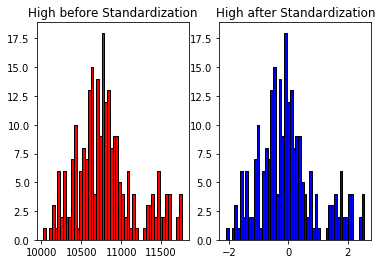

In [6]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.hist(nifty50_data['High'], color='red', edgecolor = 'black', bins=50)
plt.title('High before Standardization')

ax2 = fig.add_subplot(122)
ax2.hist(scaled_df['High'], color='blue', edgecolor = 'black', bins=50)
plt.title('High after Standardization')
plt.show()

Text(0.5, 1.0, 'Low after Standardization')

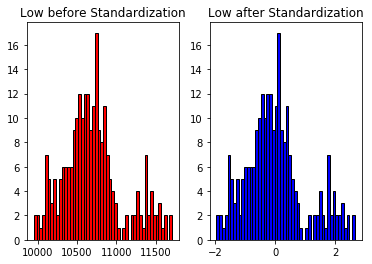

In [7]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.hist(nifty50_data['Low'], color='red', edgecolor = 'black', bins=50)
plt.title('Low before Standardization')

ax2 = fig.add_subplot(122)
ax2.hist(scaled_df['Low'], color='blue', edgecolor = 'black', bins=50)
plt.title('Low after Standardization')

Text(0.5, 1.0, 'Close after Standardization')

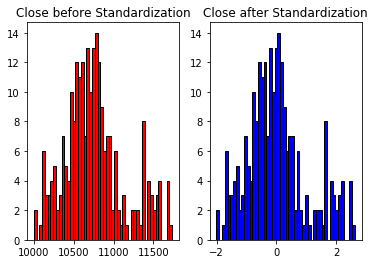

In [8]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.hist(nifty50_data['Close'], color='red', edgecolor = 'black', bins=50)
plt.title('Close before Standardization')

ax2 = fig.add_subplot(122)
ax2.hist(scaled_df['Close'], color='blue', edgecolor = 'black', bins=50)
plt.title('Close after Standardization')

For all the variables above (Open, High, Low, Close) we observe an approximte occurrence of Gaussian distribution which tells us that every latest value is pretty much independent of the occurrence of corresponding values in the past in the range of approximately 10000-11250. However, after this range  we see an occurrence of new approximate Gaussian distribution with the range 11250-11700 which again has independent values. This indicates that in the past values in 1st Gaussian distribution can possibly be dependent on the occurrence of values in the range of 2nd Gaussian distribution and vice-a-versa. 

Text(0.5, 1.0, 'Shares Traded after Standardization')

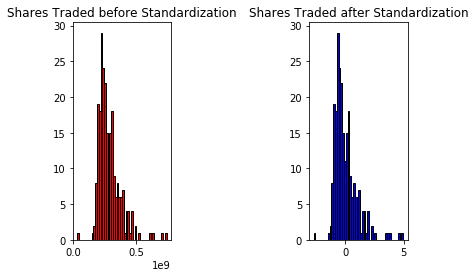

In [9]:
fig = plt.figure()

ax1 = fig.add_subplot(131)
ax1.hist(nifty50_data['Shares Traded'], color='red', edgecolor = 'black', bins=50)
plt.title('Shares Traded before Standardization')

ax2 = fig.add_subplot(133)
ax2.hist(scaled_df['Shares Traded'], color='blue', edgecolor = 'black', bins=50)
plt.title('Shares Traded after Standardization')

Text(0.5, 1.0, 'Turnover (Rs. Cr) after Standardization')

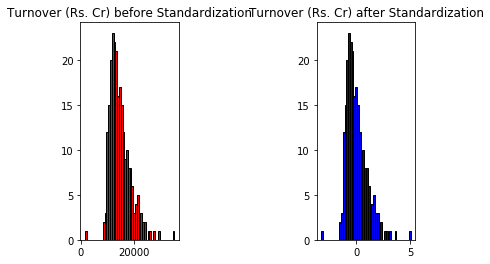

In [10]:
fig = plt.figure()

ax1 = fig.add_subplot(131)
ax1.hist(nifty50_data['Turnover (Rs. Cr)'], color='red', edgecolor = 'black', bins=50)
plt.title('Turnover (Rs. Cr) before Standardization')

ax2 = fig.add_subplot(133)
ax2.hist(scaled_df['Turnover (Rs. Cr)'], color='blue', edgecolor = 'black', bins=50)
plt.title('Turnover (Rs. Cr) after Standardization')

As we see that, all of the variables exhibit the same (Gaussian) distribution before & after standardization. This primarily means that there is no loss of information. And also that the optimizer can be efficiently used for converging to minimum error quickly. 

We will now analyse the dependence of our target variable Close on the other predictors.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


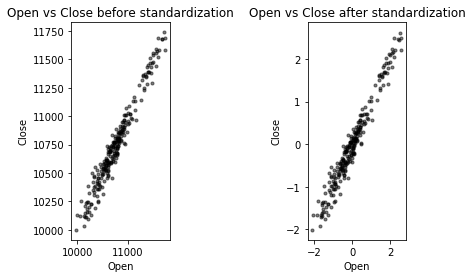

In [103]:
#####CREATING SCATTER PLOT#####

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# Create data

x = nifty50_data['Open']
y = nifty50_data['Close']
colors = (0,0,0)
area = np.pi*3

####### OPEN VS CLOSE###########
ax1 = fig.add_subplot(131)
ax1.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Open vs Close before standardization')
plt.xlabel('Open')
plt.ylabel('Close')
# plt.show()

# Create data
x = scaled_df['Open']
y = scaled_df['Close']
colors = (0,0,0)
area = np.pi*3

####### OPEN VS CLOSE###########
ax2 = fig.add_subplot(133)
ax2.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Open vs Close after standardization')
plt.xlabel('Open')
plt.ylabel('Close')

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


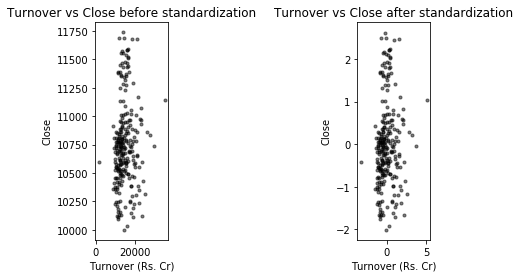

In [12]:
#####CREATING SCATTER PLOT#####

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# Create data
x = nifty50_data['Turnover (Rs. Cr)']
y = nifty50_data['Close']
colors = (0,0,0)
area = np.pi*3

####### OPEN VS CLOSE###########
ax1 = fig.add_subplot(141)
ax1.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Turnover vs Close before standardization')
plt.xlabel('Turnover (Rs. Cr)')
plt.ylabel('Close')
# plt.show()

# Create data
x = scaled_df['Turnover (Rs. Cr)']
y = scaled_df['Close']
colors = (0,0,0)
area = np.pi*3

####### OPEN VS CLOSE###########
ax2 = fig.add_subplot(144)
ax2.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Turnover vs Close after standardization')
plt.xlabel('Turnover (Rs. Cr)')
plt.ylabel('Close')

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


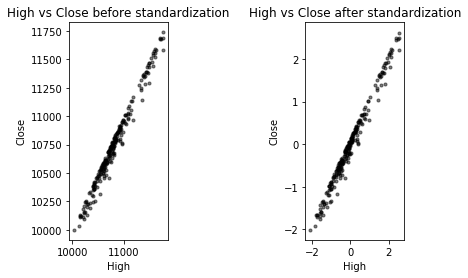

In [13]:
#####CREATING SCATTER PLOT#####

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# Create data
x = nifty50_data['High']
y = nifty50_data['Close']
colors = (0,0,0)
area = np.pi*3

####### OPEN VS CLOSE###########
ax1 = fig.add_subplot(131)
ax1.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('High vs Close before standardization')
plt.xlabel('High')
plt.ylabel('Close')
# plt.show()

# Create data
x = scaled_df['High']
y = scaled_df['Close']
colors = (0,0,0)
area = np.pi*3

####### OPEN VS CLOSE###########
ax2 = fig.add_subplot(133)
ax2.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('High vs Close after standardization')
plt.xlabel('High')
plt.ylabel('Close')

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


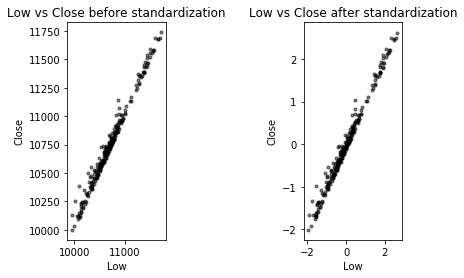

In [14]:
#####CREATING SCATTER PLOT#####

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# Create data
x = nifty50_data['Low']
y = nifty50_data['Close']
colors = (0,0,0)
area = np.pi*3


ax1 = fig.add_subplot(131)
ax1.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Low vs Close before standardization')
plt.xlabel('Low')
plt.ylabel('Close')
# plt.show()

# Create data
x = scaled_df['Low']
y = scaled_df['Close']
colors = (0,0,0)
area = np.pi*3


ax2 = fig.add_subplot(133)
ax2.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Low vs Close after standardization')
plt.xlabel('Low')
plt.ylabel('Close')

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


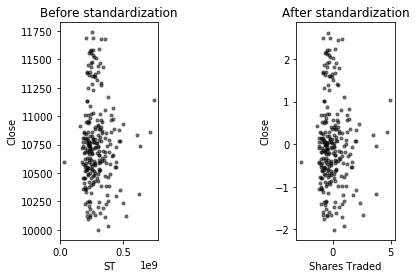

In [15]:
#####CREATING SCATTER PLOT#####

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# Create data
x = nifty50_data['Shares Traded']
y = nifty50_data['Close']
colors = (0,0,0)
area = np.pi*3

ax1 = fig.add_subplot(131)
ax1.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Before standardization')
plt.xlabel('ST')
plt.ylabel('Close')


# Create data
x = scaled_df['Shares Traded']
y = scaled_df['Close']
colors = (0,0,0)
area = np.pi*3


ax2 = fig.add_subplot(133)
ax2.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('After standardization')
plt.xlabel('Shares Traded')
plt.ylabel('Close')

plt.show()

So, here we have found correlation of every independent variable with Close (dependent variable) in both the datas (raw available data & the standardized data). By doing this we see that correlation co-efficient (& pattern) is the same in both the cases which indicates that standardized data has no loss of information and can be efficiently used for furthr analysis.
Moreover, out of all the variables we see that Open, High & Low are linearly positively correlated while Shares Traded & Turnover(Rs. Cr) has no correlation with Close.

For maximum days the no. of Shares Traded is between 0.2x10^ to 0.4x10^9 while the turnover is Rs.5000-Rs.15000 Crs.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


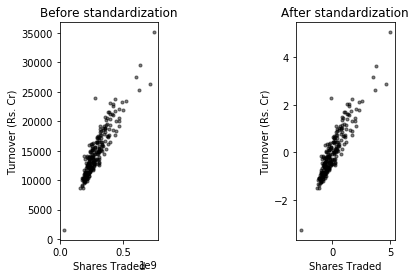

In [16]:
fig = plt.figure()

# Create data
x = nifty50_data['Shares Traded']
y = nifty50_data['Turnover (Rs. Cr)']
colors = (0,0,0)
area = np.pi*3

ax1 = fig.add_subplot(131)
ax1.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Before standardization')
plt.xlabel('Shares Traded')
plt.ylabel('Turnover (Rs. Cr)')


# Create data
x = scaled_df['Shares Traded']
y = scaled_df['Turnover (Rs. Cr)']
colors = (0,0,0)
area = np.pi*3


ax2 = fig.add_subplot(133)
ax2.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('After standardization')
plt.xlabel('Shares Traded')
plt.ylabel('Turnover (Rs. Cr)')

plt.show()

The above graph explains well that the days when lesser no. of shares are traded it is strongly correlated to the turnover than the days when higher no. of shares are traded.

Based on above results and patterns I believe to keep linear regression as the first model to predict the Close price and use this as the benchmark model. Since this is a time series data spread over the span of one year, we will create train data using data of first nine months and test data using data for last 3 months.

In [17]:
train_data=scaled_df[0:184]
test_data=scaled_df[184:]

predictors = ["Open", "High", "Low", "Shares Traded", "Turnover (Rs. Cr)"]
target = ["Close"]

train_X = train_data[predictors]
train_y = train_data[target]
test_X = test_data[predictors]
test_y = test_data[target]

In [163]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [25]:
#Linear model with all predictors
model1 = sm.OLS(train_y, train_X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     9475.
Date:                Fri, 15 Feb 2019   Prob (F-statistic):          6.80e-215
Time:                        13:13:58   Log-Likelihood:                 228.65
No. Observations:                 184   AIC:                            -447.3
Df Residuals:                     179   BIC:                            -431.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Open                 -0.6888      0.048    -14.313      0.000      -0.784      -0.594
High                  0.9101      0.055     16.669      0.000       0.802       1.018
Low                   0.7748      0.044     17.728      0.000       0.689       0.861
Shares Traded         0.0225      0.015      1.496      0.136      -0.007       0.052
Turnover (Rs. Cr)    -0.0076      0.014     -0.527      0.599      -0.036       0.021
==============================================================================
Omnibus:                        7.768   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               13.490
Skew:                           0.113   Prob(JB):                      0.00118
Kurtosis:                       4.307   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above model summary we see that we have a very good R-squared & Adj R-squared scores; now we will look at the p-value. We see that Turnover (Rs. Cr) has high value (0.599 i.e above 0.5) hence let us drop that variable and analyse the results with new model.

In [26]:
X=pd.DataFrame(train_data, columns = ["Open", "High", "Low", "Shares Traded"])
y=pd.DataFrame(train_data, columns =["Close"])
model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.189e+04
Date:                Fri, 15 Feb 2019   Prob (F-statistic):          6.72e-217
Time:                        13:13:59   Log-Likelihood:                 228.51
No. Observations:                 184   AIC:                            -449.0
Df Residuals:                     180   BIC:                            -436.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Open             -0.6881      0.048    -14.332      0.000      -0.783      -0.593
High              0.9052      0.054     16.861      0.000       0.799       1.011
Low               0.7781      0.043     18.024      0.000       0.693       0.863
Shares Traded     0.0154      0.007      2.296      0.023       0.002       0.029
==============================================================================
Omnibus:                        7.302   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               12.110
Skew:                           0.117   Prob(JB):                      0.00235
Kurtosis:                       4.235   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By running the model without Turnover (Rs. Cr) though we get the same R-Squared & Adj R-squared scores; we even see that Shares Traded has a better value (0.023) in current model than in the previous model (0.136). But let us still review the model by including Turnover & removing shares Traded.

In [27]:
X=pd.DataFrame(train_data, columns = ["Open", "High", "Low", "Turnover (Rs. Cr)"])
y=pd.DataFrame(train_data, columns =["Close"])
model3 = sm.OLS(y, X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.176e+04
Date:                Fri, 15 Feb 2019   Prob (F-statistic):          1.79e-216
Time:                        13:14:00   Log-Likelihood:                 227.51
No. Observations:                 184   AIC:                            -447.0
Df Residuals:                     180   BIC:                            -434.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Open                 -0.6858      0.048    -14.214      0.000      -0.781      -0.591
High                  0.9121      0.055     16.653      0.000       0.804       1.020
Low                   0.7672      0.044     17.613      0.000       0.681       0.853
Turnover (Rs. Cr)     0.0117      0.006      1.807      0.072      -0.001       0.024
==============================================================================
Omnibus:                        7.027   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.030   Jarque-Bera (JB):               11.331
Skew:                           0.119   Prob(JB):                      0.00346
Kurtosis:                       4.192   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After including Turnover in this model the p-value of turnover is higher than the p-value of Shares Traded in the previous model (model2). Thus, we shall not include Turnover (Rs. Cr) in predictors. However, the p-value of shares traded in model2 is greater than 0 thus we shall examine if R-squared and Adj R-squared values of a model without Turnover (Rs. Cr) and Shares Traded is greater than corrsponding values (0.996) of model2. 

In [28]:
X=pd.DataFrame(train_data, columns = ["Open", "High", "Low"])
y=pd.DataFrame(train_data, columns =["Close"])
model4 = sm.OLS(y, X).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.549e+04
Date:                Fri, 15 Feb 2019   Prob (F-statistic):          6.68e-218
Time:                        13:14:01   Log-Likelihood:                 225.85
No. Observations:                 184   AIC:                            -445.7
Df Residuals:                     181   BIC:                            -436.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.6836      0.049    -14.084      0.000      -0.779      -0.588
High           0.9548      0.050     19.201      0.000       0.857       1.053
Low            0.7235      0.036     19.856      0.000       0.652       0.795
==============================================================================
Omnibus:                        8.668   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               16.075
Skew:                           0.125   Prob(JB):                     0.000323
Kurtosis:                       4.426   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see, that there is no improvement in the R-squared & Adj R-Squared if we remove both the variables (Shares Traded & Turnover (Rs. Cr)). The p-value of Shares Traded in model2 is low which suggests that Shares Traded has very less dependency on other three predictors (Open, Low, High). Thus, keeping in mind all the above observations in the summary I believe we should provisinally proceed ahead with model2.
However, we should consider few other metrics such as calculating MAE as well.
Hence, for a final check we will now predict Close values in test data and calculate MAE for all the four models.

In [29]:
####test train split for original data.
train_data_original=nifty50_data[0:184]
test_data_original=nifty50_data[184:]

predictors_original = ["Open", "High", "Low", "Shares Traded", "Turnover (Rs. Cr)"]
target_original = ["Close"]

train_X_original  = train_data_original[predictors_original]
train_y_original  = train_data_original[target_original]
test_X_original  = test_data_original[predictors_original]
test_y_original  = test_data_original[target_original]

In [30]:
#Running predictions on original data
predictions1_original  = model1.predict(test_X_original)
mae1_original =mean_absolute_error(test_y_original, predictions1_original)
print("MAE for model1: %s"%(str(mae1_original)))

MAE for model1: 7510149.0802826295


In [31]:
predictions2_original  = model2.predict(test_X_original[["Open", "High", "Low", "Shares Traded"]])
mae2_original =mean_absolute_error(test_y_original, predictions2_original)
print("MAE for model2: %s"%(str(mae2_original)))

MAE for model2: 5144577.307894821


In [32]:
predictions3_original  = model3.predict(test_X_original[["Open", "High", "Low", "Turnover (Rs. Cr)"]])
mae3_original =mean_absolute_error(test_y_original, predictions3_original)
print("MAE for model3: %s"%(str(mae3_original)))

MAE for model3: 113.02743294750167


In [33]:
predictions4_original  = model4.predict(test_X_original[["Open", "High", "Low"]])
mae4_original =mean_absolute_error(test_y_original, predictions4_original)
print("MAE for model4: %s"%(str(mae4_original)))

MAE for model4: 56.91757497240357


On the contrary to the previous observations where model2 seemed as a promising one to be chosen; here we see that model4 has the least MAE followed by model3. This can make us conclude to select model4 as the benchmark model. However, before we finalize our benchmark model to be model4 let us crosscheck how accurate these predictions are by plotting the original values of Close variable against the predicted ones in all the model.

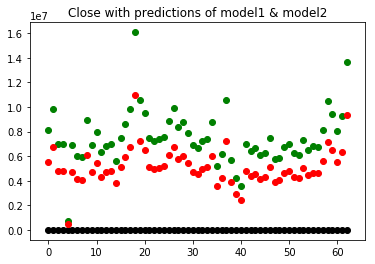

In [34]:
import numpy as np
import pylab as plb

X = [i for i in range(len(test_y_original))]

plt.scatter(X,test_y_original,color='k')
plt.scatter(X,predictions1_original,color='g')
plt.scatter(X,predictions2_original,color='r')
plt.title("Close with predictions of model1 & model2")
plt.show()

In the above graph the black dots are original values of Close while green & red dots are predicted values of Close using model1 & model2 respectively. 
Here, we see that the green & red are significantly different than black. We do not see variation in black plot in this graph because the scales of red and green plots are many orders higher than black. This is also supported from high MAE of model1 & model2.

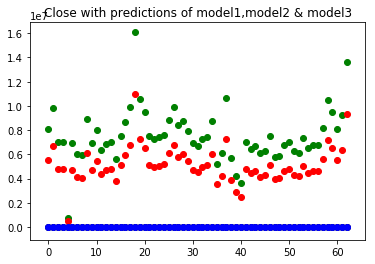

In [35]:
plt.scatter(X,test_y_original,color='k')
plt.scatter(X,predictions1_original,color='g')
plt.scatter(X,predictions2_original,color='r')
plt.scatter(X,predictions3_original,color='b')
plt.title("Close with predictions of model1,model2 & model3")
plt.show()

In the above graph the black dots are original values of Close while green, red & blue dots are predicted values of Close using model1, model2 & model3 respectively. Here, we see that the green & red are significantly different than black while the blue almost overlaps the black clearly making it not visible. This is also supported from high MAE of model1 & model2 and relatively much lesser MAE model3.

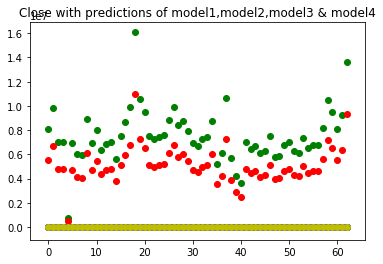

In [36]:
plt.scatter(X,test_y_original,color='k')
plt.scatter(X,predictions1_original,color='g')
plt.scatter(X,predictions2_original,color='r')
plt.scatter(X,predictions3_original,color='b')
plt.scatter(X,predictions4_original,color='y')
plt.title("Close with predictions of model1,model2,model3 & model4")
plt.show()

In the above graph we have plot original values of Close with predicted values of Close from all models.
The green & red dots represent Close predicted values from model1 & model2. While yellow dost are predicted values of Close using model4 which overlaps the blue dots that are predicted values from model3 and also overlaps the original Close values plotted.
Now, since blue dots & yellow docts are so close to the original value let us plot predicted values from model3 & model4 and original Close values for a final assurance of the model we select.

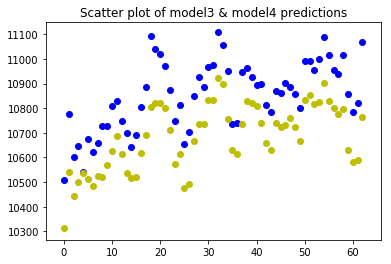

In [37]:
plt.scatter(X,predictions3_original,color='b')
plt.scatter(X,predictions4_original,color='y')
plt.title("Scatter plot of model3 & model4 predictions")
plt.show()

Here, we see that the yellow dots which are predicted values of Close using model4 is vertically lower offset than blue (predicted Close values using model3) which means it is more closer to original Close values. Hence, we can easily chose model4 over model3 and all other models.

After revisiting all our above analysis that includes model summary, calculating MAE & scatter plot we finally conclude **model4** as the benchmark model. Below mentioned pointers are few factors to support our concluding results:
1. Model4 has all the variables with p-value=0.00, which means that there exists no collinearity between variables.
2. R-squared & Adj. R-squared for model4 is not lesser than that for all other three models.
3. BIC for model4 is the least.
4. MAE for model4 is least and significantly lesser.

Now let us check if the three chosen variables i.e Open, Low & High constitute the principal components of our dataset. 
For the same, let us use the fundamentals of Principal Component Analysis on our dataet. 

**Using PCA to find fundamental components of the dataset**

In [38]:
from sklearn.decomposition import PCA

In [39]:
def pca_results(scaled_df, pca):
    '''
    reate a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(scaled_df.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [40]:
pca = PCA(n_components = 5)
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

             Explained Variance    Open    High     Low   Close  \
Dimension 1              0.6636  0.4983  0.5002  0.4985  0.4984   
Dimension 2              0.3188 -0.0193 -0.0019 -0.0545 -0.0244   
Dimension 3              0.0128  0.0008  0.0182 -0.0651 -0.0455   
Dimension 4              0.0034  0.7150  0.1068 -0.1426 -0.6746   
Dimension 5              0.0012 -0.0719  0.6358 -0.7431  0.1853   

             Shares Traded  Turnover (Rs. Cr)  
Dimension 1         0.0032             0.0678  
Dimension 2         0.7091             0.7023  
Dimension 3        -0.7046             0.7049  
Dimension 4         0.0227            -0.0376  
Dimension 5         0.0107            -0.0623  


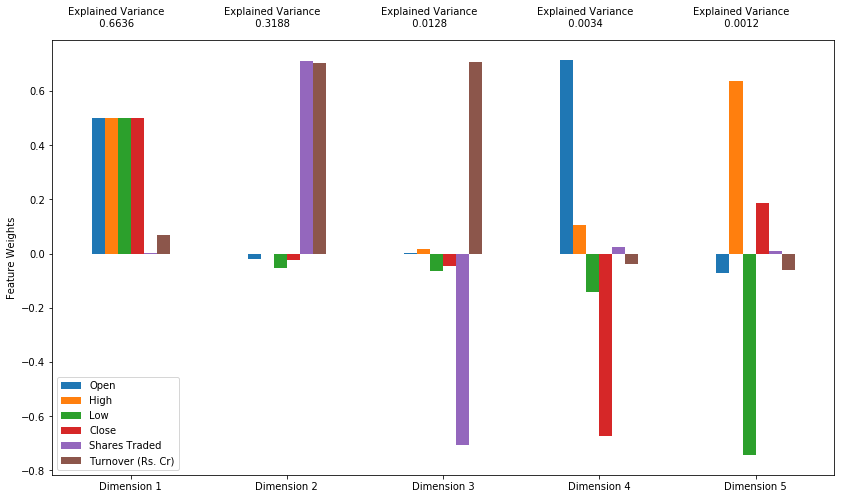

In [41]:
# Generate PCA results plot
pca_results_1 = pca_results(scaled_df, pca)

print(pca_results_1)

In the above graph & table we see that the first component explains the most variance in the dataset i.e (66.36%). Also, this component includes all the variables which we chose in the final model of our linear regression model i.e Open, High & Low.

             Explained Variance    Open     Low    High
Dimension 1              0.9937  0.5776  0.5768  0.5777
Dimension 2              0.0040  0.4521 -0.8152  0.3621
Dimension 3              0.0022 -0.6798 -0.0520  0.7316


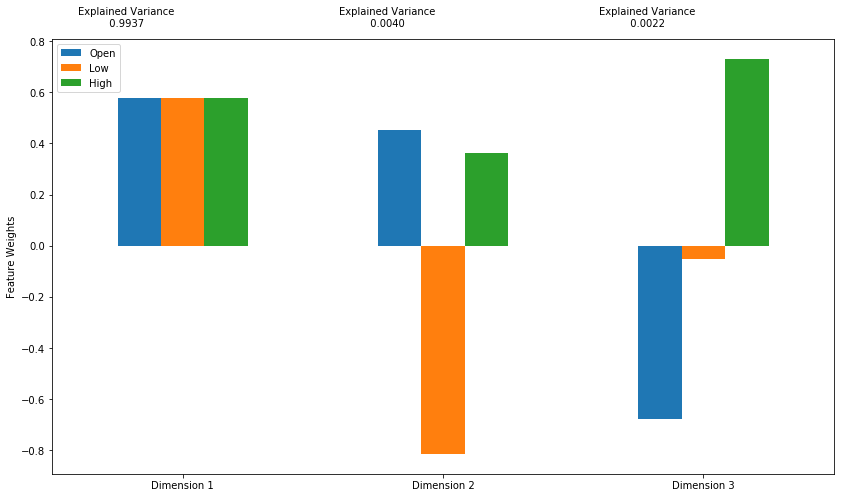

In [42]:
pca = PCA(n_components = 3)
scaled_df_reduced = scaled_df[["Open", "Low", "High"]]
pca.fit(scaled_df_reduced)
pca_results_reduced = pca_results(scaled_df_reduced, pca)
print(pca_results_reduced)


As we learn from the linear regression that Open, High & Low are the most important predictors that leads to the least MAE & least BIC, we observed the graph above that Open, Low & High explains data almost completely. We also see that these three independent predcitors are equally important as the 1st principal component. 

We will now use more computations and work towards better accuracy of the model. For that we will use deep learning.

**Deep Learning Predictions follow**

From Deep Learning we will actually predict the normalised Close price 3 months in advance. Since, its a time series data we will use LSTM which is a special case of recurrent Neural Networks.

We first create a model with normalized dataset

**deep_model1**

In [100]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [44]:
#Normalizing the dataset & extracting out normalized Close price as original series
from sklearn import preprocessing 
numeric_columns = ["Open", "High", "Low", "Close", "Shares Traded", "Turnover (Rs. Cr)"]
nifty50_data_numeric = nifty50_data[numeric_columns]
x= nifty50_data_numeric.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
nifty50_close_normalized = pd.DataFrame(x_scaled)[3]
nifty50_close_normalized.reset_index(drop=True, inplace=True)
print(nifty50_close_normalized.head())

0    0.585395
1    0.438134
2    0.384096
3    0.287397
4    0.275015
Name: 3, dtype: float64


Let us examine the normalized Close data

Text(0.5, 1.0, '')

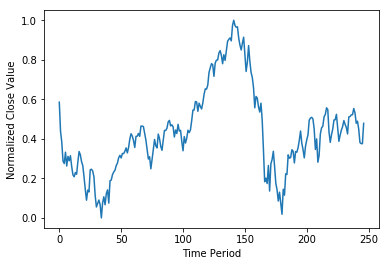

In [113]:
plt.plot(nifty50_close_normalized)
plt.xlabel('Time Period')
plt.ylabel('Normalized Close Value')
plt.title('')

Since we need to use the normalized Close as the original series where data at time p depends on the dataat any interval previous to p. Therefore, we create a window of 5 data points (p-5, p-4, p-3, p-2, p-1) to predict data at p, this window keeps sliding ahead by 1 time stamp, hence creating training predictors from the window and training target at the value at p.

In [46]:
def create_training_window(original_series,window_size):
    X = []
    y = []    
    for i in range(window_size, len(original_series)):
        X.append(original_series[i - window_size:i])
        y.append(original_series[i])       
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)
    return(X,y)

In [47]:
window_size = 5
X,y = create_training_window(original_series = nifty50_close_normalized,window_size = window_size)

From the original data we will use the dat from February to October as training data and November to January as the time period where we want to predict the normalized closing price. In the original data the first 183 points correspond to period February to October which is our training window and points starting from index corresponds to period November to January which is our test window.

In [48]:
pivot = 184
X_train = X[:pivot,:]
y_train = y[:pivot]
X_test = X[pivot:,:]
y_test = y[pivot:]
# reshaping to be used with LSTM in Keras
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras

np.random.seed(0)

# defining the lstm model
model = Sequential()
model.add(LSTM(5, input_shape=(window_size, 1)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)

# running the model on train data
model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
184/184 [==============================] - 1s 3ms/step - loss: 0.1140
Epoch 2/500
184/184 [==============================] - 0s 167us/step - loss: 0.0894
Epoch 3/500
184/184 [==============================] - 0s 210us/step - loss: 0.0729
Epoch 4/500
184/184 [==============================] - 0s 188us/step - loss: 0.0595
Epoch 5/500
184/184 [==============================] - 0s 219us/step - loss: 0.0486
Epoch 6/500
184/184 [==============================] - 0s 207us/step - loss: 0.0395
Epoch 7/500
184/184 [==============================] - 0s 186us/step - loss: 0.0322
Epoch 8/500
184/184 [==============================] - 0s 225us/step - loss: 0.0267
Epoch 9/500
184/184 [==============================] - 0s 185us/step - loss: 0.0229
Epoch 10/500
184/184 [==============================] - 0s 289us/step - loss: 0.0202
Epoch 11/500
184/184 [===================

In [51]:
# calculating predictions for training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = 0.0023758404321320677
testing error = 0.0025014345261171974


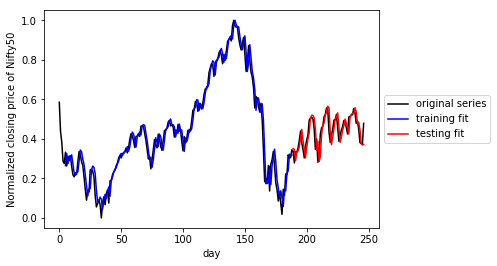

In [53]:
#plotting the original series, testing fit and training fit

import matplotlib.pyplot as plt
%matplotlib inline

# plot original series
plt.plot(nifty50_close_normalized,color = 'k')

# plot training set prediction
split_pt = pivot + window_size 
plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('Normalized closing price of Nifty50')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

We see that the testing fit in red color fits very well with original series. Hence, the predictions made three months in advance are almost accuarte. The testing error is also as small as 0.25%. Let us now calculate the F1 score for this model.

In [145]:
original_deltas = []
prediction_deltas = []
original_test_window = np.asarray(nifty50_close_normalized[pivot:])
prediction_window = []
true_positives = 0
false_positives = 0
false_negatives = 0

for i, close in enumerate(original_test_window):
    if(i>0 and i<len(original_test_window)-1):
        if(original_test_window[i+1] > close):
            original_deltas.append(True)
        else:
            original_deltas.append(False)
    
for values in np.asarray(test_predict):
    prediction_window.append(values[0])
    
for i, close in enumerate(prediction_window):
    if(i>0 and i<len(prediction_window)-1):
        if(prediction_window[i+1] > close):
            prediction_deltas.append(True)
        else:
            prediction_deltas.append(False)
    
for od, pd in zip(prediction_deltas, original_deltas):
    if(od == True and pd == True):
        true_positives+=1
    elif(od == False and pd == True):
        false_positives+=1
    elif(od == True and pd == False):
        false_negatives+=1

precision = true_positives/(true_positives+false_positives)
recall = true_positives/(true_positives+false_negatives)

f1_score = 2*(recall*precision)/(recall+precision)

print("f1_score = %s"%(f1_score))

f1_score = 0.5588235294117646


We see that the f1-score is 0.55 which is greater than 0.5. A f1-score greater than 0.5 suggests that the model is good in predicting, and this f1-score combined with a low error rate of 0.25% builds a well suited model to predict the closing price of Nifty50 three months in advance. 

Let us see if the predictions are any better if we use standardized data instead on normalized data.

**deep_model2**

training error = 0.04570667348478152
testing error = 0.05231296579385626


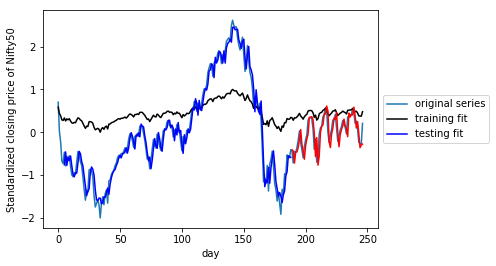

In [146]:
nifty50_close_standardized = scaled_df["Close"]

plt.plot(nifty50_close_standardized)
plt.xlabel('Time Period')
plt.ylabel('Standardized Close Value')
plt.title('')

window_size = 5
X,y = create_training_window(original_series = nifty50_close_standardized,window_size = window_size)

pivot = 184
X_train = X[:pivot,:]
y_train = y[:pivot]
X_test = X[pivot:,:]
y_test = y[pivot:]
# reshaping to be used with LSTM in Keras
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

np.random.seed(0)

# defining the lstm model
model = Sequential()
model.add(LSTM(5, input_shape=(window_size, 1)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)

# running the model on train data
model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0)

# calculating predictions for training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

# plot original series
plt.plot(nifty50_close_normalized,color = 'k')

# plot training set prediction
split_pt = pivot + window_size 
plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('Standardized closing price of Nifty50')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

We observe that training and testing errors are way higher when using standardized data compare to normalized data. Training error is around 19.56 times higher and testing error is around 20.8 times higher when model is trained on standardized data compared to normalized data. This is evident from the predictions plot. This means the data is less sensitive to features and needed centrization. 

**Thus we discard the deep learning model trained on standardized data (deep_model2) and approve the deep learning model trained on normalized data (deep_model1).** 

We shall therefore find the MAE of our linear regression model4 and set this new model as the benchmark model.

Running Linear Regression on normalized data

In [161]:
import pandas as pd
subset_columns = ["Open", "High", "Low", "Close"]
nifty50_data_lr4_subset = nifty50_data[subset_columns]
x = nifty50_data_numeric.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(nifty50_data_lr4_subset)
nifty50_lr4_normalized = pd.DataFrame(x_scaled)
nifty50_lr4_normalized.reset_index(drop=True, inplace=True)
nifty50_lr4_normalized.columns = subset_columns
print(nifty50_lr4_normalized.head())

       Open      High       Low     Close
0  0.603337  0.628947  0.527067  0.585395
1  0.543690  0.535209  0.445923  0.438134
2  0.356422  0.389639  0.361026  0.384096
3  0.183034  0.326955  0.184465  0.287397
4  0.358048  0.338413  0.281190  0.275015


In [166]:
train_data_normalized=nifty50_lr4_normalized[0:184]
test_data_normalized=nifty50_lr4_normalized[184:]
test_X_normalized
predictors_normalized = ["Open", "High", "Low"]
target_normalized = ["Close"]

train_X_normalized = train_data_normalized[predictors_normalized]
train_y_normalized = train_data_normalized[target_normalized]
test_X_normalized = test_data_normalized[predictors_normalized]
test_y_normalized = test_data_normalized[target_normalized]

In [170]:
X=pd.DataFrame(train_X_normalized)
y=pd.DataFrame(train_y_normalized)
model_lr4_normalized = sm.OLS(y, X).fit()
model_lr4_normalized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.418e+04
Date:                Fri, 15 Feb 2019   Prob (F-statistic):          1.16e-273
Time:                        16:26:30   Log-Likelihood:                 507.39
No. Observations:                 184   AIC:                            -1009.
Df Residuals:                     181   BIC:                            -999.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.6824      0.049    -14.055      0.000      -0.778      -0.587
High           0.9701      0.049     19.801      0.000       0.873       1.067
Low            0.7078      0.034     20.791      0.000       0.641       0.775
==============================================================================
Omnibus:                        7.114   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.029   Jarque-Bera (JB):               12.291
Skew:                           0.046   Prob(JB):                      0.00214
Kurtosis:                       4.263   Cond. No.                         50.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**MAE for model 4 for normalized data**

This model (model_lr4_normalized) is excellent and far better than _model4_ because its R-squared and Adj. R-squared are 0.999 which is higher than that of model4 and AIC (-1009.0 compared to previous -445.7) as well as BIC (-999.1 compared to previous -436.1) are significantly low, thus making this model (model_lr4_normalized) far superior than model4. We therefore set model_lr4_normalized as the benchmark model and will now calculate the error associated with this model and compare that with deep_model1. Based on the comparison between model_lr4_normalized and deep_model1, we will choose the model with low error as our final model.

In [180]:
predictions_lr4_normalized  = model_lr4_normalized.predict(test_X_normalized)
mae_lr4_normalized =mean_absolute_error(test_y_normalized, predictions_lr4_normalized)
print("MAE for model4 Normalized: %s"%(str(mae_lr4_normalized)))

MAE for model4 Normalized: 0.013157676547658754


We therefore conclude that normalized data shall be used instead of standardized data. The close price is sufficient to be put with LSTM for forecasting prices three months in advance. The testing error of deep_model1 (0.0025014345261171974) is significantly less than the MAE (0.013157676547658754) of benchmark linear regression model. Thus, the error of deep learning model is around (1/65)th of the error associated with best linear regression model. We therefore conclude our deep learning model forecasts the closing price of Nifty50 very well 3 months in advance. 